In [1]:
import numpy as np
from core import initialize_bodies
from core import Body
from quadtree import Node
from quadtree import Quadtree
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation

# initialize bodies with random masses, positions, and velocities over set range
# bodies[n] = Body(mass, position [x, y], velocity [vx, vy])
bodies = initialize_bodies(20, mass_range = [1e-7, 1], position_range = [-32, 32], velocity_range = [-0.01,0.01])


# using dimensionless units in terms of solar masses, AU

# solar system
'''bodies = [
    Body(mass = 1, position=[0, 0], velocity=[0, 0]), # sun
    Body(mass = 3.00e-6, position=[1, 0], velocity=[0, 1]), # earth
    Body(mass = 3.21e-7, position=[1.5, 0], velocity=[0, np.sqrt(1/1.5)]), # mars
    Body(mass = 9.55e-4, position=[5.2, 0], velocity=[0, np.sqrt(1/5.2)]), # jupiter
    Body(mass = 2.86e-4, position=[9.5, 0], velocity=[0, np.sqrt(1/9.5)]), # saturn
    Body(mass = 4.36e-5, position=[19.2, 0], velocity=[0, np.sqrt(1/19.2)]), # uranus
    Body(mass = 5.15e-5, position=[30.1, 0], velocity=[0, np.sqrt(1/30.1)]) # neptune
]'''




#QuadTest = Quadtree(bodies, 64)

'''
# print node data
for i in range(len(QuadTest.nodelist)):
    print(f'Node {i} points {QuadTest.nodelist[i].points } nodeposition {QuadTest.nodelist[i].nodeposition} size {QuadTest.nodelist[i].size} CoM {QuadTest.nodelist[i].find_CoM(bodies)}')
'''

"\n# print node data\nfor i in range(len(QuadTest.nodelist)):\n    print(f'Node {i} points {QuadTest.nodelist[i].points } nodeposition {QuadTest.nodelist[i].nodeposition} size {QuadTest.nodelist[i].size} CoM {QuadTest.nodelist[i].find_CoM(bodies)}')\n"

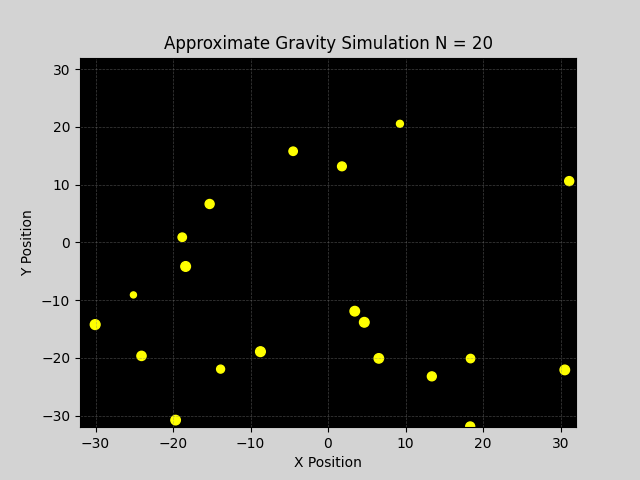

In [2]:
# Example animation using matplotlib

%matplotlib widget

# Time step for position updates
dt = 0.1

# Set up the plot
#fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
fig, ax = plt.subplots()
ax.set_xlim(-32, 32) # X-axis limits
ax.set_ylim(-32, 32) # Y-axis limits
ax.set_title(f'Approximate Gravity Simulation N = {len(bodies)}', color="black")  # Title
ax.set_xlabel("X Position", color="black")  # X-axis label
ax.set_ylabel("Y Position", color="black")  # Y-axis label
ax.tick_params(axis='x', colors="black")  # X-axis ticks
ax.tick_params(axis='y', colors="black")  # Y-axis ticks
ax.set_facecolor("black")  # Set background color
fig.patch.set_facecolor("lightgray")  # Outside the plot
ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

#colors = [cmap(i) for i in range(len(bodies))] # Create list of colors
colors = ['yellow', 'blue', 'red', 'orange', 'goldenrod', 'lightblue', 'mediumblue'] # planet colors

# Create scatter plot with initial positions
scat = ax.scatter(
    [body.position[0] for body in bodies], # Initial x-coordinate of bodies
    [body.position[1] for body in bodies], # Initial y-coordinate of bodies
    s=[50*(body.mass)**(1/3) for body in bodies], # Size of bodies proportional to mass
    c='yellow',  # Color of bodies
)
# Plot node markers
'''
pos1 = []
pos2 = []
for i in range(len(QuadTest.nodelist)):
    pos1.append(QuadTest.nodelist[i].nodeposition[0])
    pos2.append(QuadTest.nodelist[i].nodeposition[1])

scat2 = ax.scatter(pos1, pos2, c='blue')'''
'''
# Draw quadtree
for i in range(len(QuadTest.nodelist)):
    formatcoords = [QuadTest.nodelist[i].nodeposition[0]-(64/2**(QuadTest.nodelist[i].size)), QuadTest.nodelist[i].nodeposition[1]-(64/2**(QuadTest.nodelist[i].size))]

# If you want to do graphical representations of the quadtree, you need to subtract 1 from the size. It's just kind of a quirk of how i coded it. 
    Rect = patches.Rectangle(formatcoords, (64/2**(QuadTest.nodelist[i].size-1)), (64/2**(QuadTest.nodelist[i].size-1)), ec = 'black', fill =False)
    plt.gca().add_patch(Rect)
'''

# Update function for animation
def update_position(frame):

    for n, body in enumerate(bodies):

        QuadTest = Quadtree(bodies, 64)
        body.force = np.array([0.0, 0.0]) # Reset force on body
        QuadTest.traverse_quadtree(0,n) # Calculate forces

        # Leapfrog method
        body.velocity += 0.5 * body.force / body.mass * dt # Update velocity (half step)
        body.position += body.velocity * dt # Update position (full step)
        QuadTest.traverse_quadtree(0,n) # Recalculate force
        body.velocity += 0.5 * body.force / body.mass * dt # Update velocity (second half step)
        positions = [body.position for body in bodies] # Create array of positions to update scatter plot
        body.force = np.array([0.0, 0.0]) # Reset force on body
    scat.set_offsets(positions)  # Update scatter plot
  
    return scat


 # Create the animation
ani = animation.FuncAnimation(
    fig=fig,
    func=update_position,
    frames=range(2000),  # Number of frames
    interval=10,  # Time between frames in milliseconds
    repeat=False,  # Stop after the last frame
)

#ani.save('approximate_simulation_500body.mp4', writer='ffmpeg', fps=30) # Save animation as .mp4


# Show the plot
plt.show()

In [ ]:
for i, body in enumerate(bodies):
    QuadTest.traverse_quadtree(0,i)
    print(f'Body_{i} position: {body.position}')
    print(f'Body_{i} mass: {body.mass}')
    print(f'Body_{i} force: {body.force}')